In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

idx  = pd.IndexSlice

# FDI

In [2]:
url_FDICountry = "https://geostat.ge/media/43842/FDI_Eng-countries.xlsx"
import openpyxl
df_FDICountry = pd.read_excel(url_FDICountry, sheet_name = "FDI (annual)",header = 3, skipfooter = 14)

In [3]:
df_FDICountry

,Code,Countries,1996,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021*
0,NaN,Total,3753.45,242586,265331.769513,82207,131231.878347,109839.835488,160211.960454,334567.84162,...,1048227.045433,1039174.152485,1836979.976503,1728758.129864,1653993.3841,1980773.3426,1317071.4413,1335810.6439,571963.2561,1152817.6186
1,NaN,of which:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,EU counties (27),-,20808.371148,23068.815474,3525.273546,36726.839923,63421.349613,40469.434942,58063.057716,...,370060.669997,369928.682571,727114.37775,417150.402507,327813.0512,558531.1222,416764.4483,426918.626,333129.4972,327877.6462
3,40.0,Austria,-,18688.22432,18876.639337,-,-,-,-137.20896,17971.165858,...,25999.225115,7008.170988,8000.442038,19621.375218,27805.2789,6287.2705,17361.0086,15231.2078,-10654.2515,5937.8846
4,56.0,Belgium,-,-,-,-,-,-,-,-,...,-844.8066,637.3268,1485.556,280.2875,17867.4493,4313.4712,3482.8453,1522.7314,4857.8513,2079.7791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,826.0,United Kingdom,-,24985.511495,26471.589257,5036.176714,4823.975704,8508.687993,14719.529864,34842.840181,...,95536.664823,55171.312715,108850.796451,399346.841345,87849.542,249032.362,182923.8353,236860.4844,302984.8908,596616.9694
80,840.0,United States,-,96651.887424,104427.22618,59151.289331,38717.651556,23281.158381,81609.826028,71603.885369,...,20253.9991,53885.224061,184442.755304,18898.423706,59817.1044,79115.3347,104964.0622,115592.2585,98440.9332,6150.9768
81,NaN,Other countries,-,-,-,-,-,-,-,-,...,21397.446834,14791.355772,12739.540876,14892.9665,15390.8614,12658.9677,4040.125,14903.7709,2196.9728,13401.7552
82,NaN,Unknown,-,-,-,-,-,-,627.86159,853.61444,...,-,-,-,6743.0347,-4702.3455,-,-,-,-,-


In [4]:
df_FDICountry.rename(columns={"2021*":2021}, inplace = True)

In [5]:
df_FDICountry.iloc[2,1] = "EU countries"

In [6]:
df_FDICountry.drop(1, inplace = True)

In [7]:
df_FDICountry.drop(columns = "Code", inplace = True)

In [8]:
df_FDICountry.replace(to_replace = "-", value = 0, inplace = True)

In [9]:
df_FDICountry[df_FDICountry['Countries'].isna()]

,Countries,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_FDICountry.dropna(axis=0, how='all', inplace=True)

In [11]:
df_FDICountry.head()

,Countries,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Total,3753.45,242586.000000,265331.769513,82207.000000,131231.878347,109839.835488,160211.960454,334567.841620,492329.440023,...,1.048227e+06,1.039174e+06,1.836980e+06,1.728758e+06,1.653993e+06,1.980773e+06,1.317071e+06,1.335811e+06,571963.2561,1.152818e+06
2,EU countries,0.00,20808.371148,23068.815474,3525.273546,36726.839923,63421.349613,40469.434942,58063.057716,107226.112025,...,3.700607e+05,3.699287e+05,7.271144e+05,4.171504e+05,3.278131e+05,5.585311e+05,4.167644e+05,4.269186e+05,333129.4972,3.278776e+05
3,Austria,0.00,18688.224320,18876.639337,0.000000,0.000000,0.000000,-137.208960,17971.165858,23019.989682,...,2.599923e+04,7.008171e+03,8.000442e+03,1.962138e+04,2.780528e+04,6.287270e+03,1.736101e+04,1.523121e+04,-10654.2515,5.937885e+03
4,Belgium,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.448066e+02,6.373268e+02,1.485556e+03,2.802875e+02,1.786745e+04,4.313471e+03,3.482845e+03,1.522731e+03,4857.8513,2.079779e+03
5,Bulgaria,0.00,0.000000,0.000000,46.930700,2172.174954,2238.914739,0.000000,0.000000,0.000000,...,2.269497e+03,2.566308e+03,9.151545e+03,7.196699e+03,1.647168e+03,4.858656e+03,7.426746e+03,5.857047e+03,-1739.1844,4.050176e+03


In [12]:
df_FDICountry.describe(include="all")

,Countries,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,81,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,81.000000,8.100000e+01
unique,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Other countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,139.016667,8984.666667,9827.102575,3044.703704,4860.439939,4068.142055,5920.487506,12365.604606,18221.522208,...,3.803983e+04,3.781286e+04,6.934470e+04,6.345373e+04,6.078465e+04,7.333091e+04,4.876033e+04,4.938948e+04,21165.823743,4.265139e+04
std,NaN,713.265242,35889.069853,38795.186939,14036.778023,18467.613455,15045.649121,23719.452802,44809.913894,65107.169313,...,1.351663e+05,1.333432e+05,2.433453e+05,2.292981e+05,2.178825e+05,2.602933e+05,1.719509e+05,1.773130e+05,89959.160900,1.679632e+05
min,NaN,0.000000,0.000000,-2667.560000,-547.404634,-50.950742,-36.425596,-2215.848880,0.000000,0.000000,...,-5.435377e+03,-4.428540e+04,-1.059804e+05,-3.463844e+04,-8.831696e+04,-9.450772e+04,-8.644045e+04,-3.471626e+04,-210092.413900,-3.977760e+04
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,6.327700e+01,0.000000e+00,7.645000e+00,4.671882e+02,5.052137e+02,5.135460e+01,-84.348800,1.921103e+02
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.269497e+03,2.190028e+03,2.030814e+03,2.204768e+03,3.094233e+03,2.516090e+03,2.028227e+03,2.735859e+03,976.633700,2.508438e+03
75%,NaN,0.000000,0.000000,0.000000,0.000000,41.003056,0.000000,87.774160,1438.500247,1280.000006,...,2.201732e+04,2.310090e+04,2.004815e+04,1.862883e+04,2.548083e+04,1.291344e+04,1.736101e+04,2.240869e+04,6970.890000,9.274351e+03


In [13]:
df_FDICountry.nunique()

Countries    80
1996          2
1997         20
1998         22
1999         19
2000         23
2001         22
2002         27
2003         35
2004         30
2005         48
2006         54
2007         60
2008         59
2009         65
2010         67
2011         70
2012         70
2013         76
2014         76
2015         78
2016         79
2017         81
2018         79
2019         79
2020         79
2021         81
dtype: int64

<AxesSubplot:>

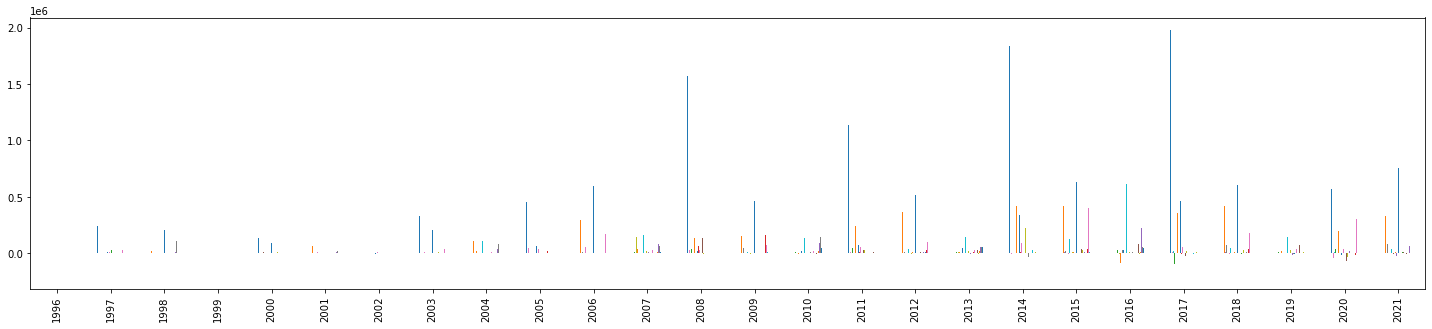

In [14]:
df_FDICountry.set_index("Countries").T.plot(kind = 'bar', figsize = (25,5), legend = False)

In [15]:
df_FDICountry.set_index("Countries", drop = False, inplace = True) #keep Countries also as alist for Plotly

In [17]:
fig1 = px.pie(df_FDICountry.loc[["EU countries","CIS countries", "Other countries"]], values = 2021,names = "Countries", title = "FDI by Country groups in 2021 (preliminary values)", height = 750)
fig1.update_traces(textposition='inside', textinfo='percent+label')
fig1.show()

In [18]:
df_FDICountry2 = df_FDICountry.drop(index = ["Total", "EU countries", "Other countries", "CIS countries"])
df_FDICountry2.drop(columns = "Countries", inplace = True)
df_FDICountry2 = df_FDICountry2.T
df_FDICountry2.reset_index(drop= False, inplace= True)

In [19]:
df_FDICountry2

Countries,index,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,...,Seychelles,Switzerland,Syrian,United Arab Emirates,Turkey,Egypt,United Kingdom,United States,Unknown,International Organizations
0,1996,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,1997,18688.224320,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,14950.579456,0.000000,24985.511495,96651.887424,0.00000,0.000000
2,1998,18876.639337,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,15101.311470,0.000000,26471.589257,104427.226180,0.00000,0.000000
3,1999,0.000000,0.000000,46.930700,0.0000,895.013450,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,9831.127839,0.000000,5036.176714,59151.289331,0.00000,0.000000
4,2000,0.000000,0.000000,2172.174954,0.0000,3921.109728,0.000000,0.000000,0.000000,0.0000,...,0.000000,599.017874,0.000000,0.000000,28601.024958,0.000000,4823.975704,38717.651556,0.00000,0.000000
5,2001,0.000000,0.000000,2238.914739,0.0000,19209.077981,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,8456.082302,0.000000,8508.687993,23281.158381,0.00000,0.000000
6,2002,-137.208960,0.000000,0.000000,0.0000,1062.712164,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,8246.377340,0.000000,14719.529864,81609.826028,627.86159,448.531800
7,2003,17971.165858,0.000000,0.000000,0.0000,675.727949,249.770687,0.000000,0.000000,0.0000,...,0.000000,24.812340,0.000000,291.142848,16673.840354,0.000000,34842.840181,71603.885369,853.61444,1235.937360
8,2004,23019.989682,0.000000,0.000000,0.0000,21333.115095,276.575717,0.000000,0.000000,0.0000,...,0.000000,42.634570,0.000000,0.000000,33325.950050,0.000000,85099.450378,80753.732613,268.31440,776.706830
9,2005,14784.520351,0.000000,70.760471,0.0000,47537.321268,1279.555401,318.976155,0.000000,0.0000,...,154.312890,348.385135,0.000000,280.461811,21519.854918,0.000000,131546.397550,15088.925954,328.45036,3279.470620


In [20]:
fig2list = list(df_FDICountry2.columns.values)
#fig2list = list(range(1996,2022))
fig2list.pop(0)

'index'

In [21]:
df_FDICountry2.describe(include="all")

Countries,index,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,...,Seychelles,Switzerland,Syrian,United Arab Emirates,Turkey,Egypt,United Kingdom,United States,Unknown,International Organizations
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2008.500000,13845.750046,1434.508799,1880.008637,115.810838,8097.906664,33930.946512,10296.947513,4310.542013,352.768308,...,2512.519726,10871.920196,100.933093,43700.277496,74898.669668,3548.184797,126849.724089,69866.025425,572.059634,13043.639231
std,7.648529,13224.372210,3645.310685,2840.628448,434.639732,41165.623212,49858.374066,29404.541364,6232.709199,616.432166,...,4752.548190,21579.796799,223.595147,71001.075357,67624.650551,11423.352074,138838.980941,50350.747471,2705.149699,34806.930287
min,1996.000000,-10654.251500,-844.806600,-1739.184400,-326.667200,-86440.447500,-6963.380100,-7282.573400,-332.451900,-435.825700,...,-4513.496200,-11984.003300,-71.409100,-12654.671900,0.000000,-1101.273630,0.000000,-10025.984700,-4702.345500,-105980.379157
25%,2002.250000,6025.231075,0.000000,0.000000,0.000000,-4259.368743,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,17885.343995,0.000000,28564.401988,26283.807441,0.000000,112.132950
50%,2008.500000,12734.630066,11.684100,194.837330,0.000000,978.862807,15852.375690,137.172100,192.731600,0.000000,...,77.156445,473.701504,1.372250,25671.176437,68518.262274,0.000000,86474.496189,70021.873465,0.000000,2897.780260
75%,2014.750000,19435.191248,1473.225107,2492.104843,0.000000,23077.963624,46368.456775,8818.807575,7465.918836,638.072100,...,4339.432265,18904.297008,93.398300,53623.787254,96434.805507,635.879525,167946.253857,100235.230110,0.000000,28967.157180
max,2021.000000,51463.374336,17867.449300,9151.545297,2028.226800,140599.564480,209229.387270,144931.448530,19714.234700,2216.414400,...,19827.779000,89958.560934,983.190300,306576.322150,256215.300400,55750.580000,596616.969400,184442.755304,11066.782500,94896.504400


In [22]:
df_FDICountry2.loc[:,'Sweden']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9      160.449563
10     189.499026
11    6223.508038
12    7634.829303
13   -8831.449900
14   -1596.081900
15   -3615.206800
16   -4464.534700
17    5265.196400
18    1059.053300
19    8726.692100
20    3094.232600
21    2039.670700
22    1070.660300
23    4706.552100
24    7697.589000
25    3876.176200
Name: Sweden, dtype: float64

In [23]:
fig2 = go.Figure()
colorlist1 = list(range(28))
for CountryNo, CountryName in enumerate(fig2list):
    if CountryNo < 28: #EU Countries
        fig2.add_trace(go.Scatter(
            x = df_FDICountry2['index'], 
            y = df_FDICountry2[CountryName],
            name = CountryName,
            mode = 'lines',
            #marker_color='blue',
            #marker_color='Denim Blue',
            #line=dict(width=0.5, color='#004494'),
            line=dict(width=0.5, color="#{}{}{}".format('00', '44', str(int(CountryNo/8)+90))),
            #line=dict(width=0.5,cmin=0,cmax=27, color=colorlist1, colorscale="Viridis"),
            stackgroup= 'one',
            ))

    elif CountryNo < 38:  #CIS Countries
        fig2.add_trace(go.Scatter(
            x = df_FDICountry2['index'], 
            y = df_FDICountry2[CountryName],
            name = CountryName,
            mode = 'lines',
            stackgroup= 'one',
            #marker_color='LightCoral'
            #line=dict(width=0.5, color='#CD0000')
            line=dict(width=0.5, color="#{}{}{}".format(str(int(CountryNo/4)+90), '00','00')),
            ))
    else:
        fig2.add_trace(go.Scatter(
            x = df_FDICountry2['index'], 
            y = df_FDICountry2[CountryName],
            name = CountryName,
            mode = 'lines',
            stackgroup= 'one'
            ))
fig2.update_layout(title = "FDI by Country (blue EU, red CIS)", xaxis_title = "Year", yaxis_title= "in thousand  US-$")
fig2.show()

In [24]:
fig3 = px.pie(df_FDICountry.loc[["EU countries","CIS countries", "Other countries"]], values = 2019,names = "Countries", title = "FDI by Country in 2019 (preliminary values)", height = 750)
fig3.update_traces(textposition='inside', textinfo='percent+label')
fig3.show()

In [25]:
fig4 = px.pie(df_FDICountry.loc[["EU countries","CIS countries", "Other countries"]], values = 2017,names = "Countries", title = "FDI by Country in 2017 (preliminary values)", height = 750)
fig4.update_traces(textposition='inside', textinfo='percent+label')
fig4.show()

In [26]:
fig5 = px.pie(df_FDICountry2.set_index('index').T.reset_index(), values = 2017,names = "Countries", title = "FDI by Country in 2017 (preliminary values)", height = 750)
fig5.update_traces(textposition='inside', textinfo='percent+label')
fig5.show()

In [27]:
df_FDICountry2.set_index('index').T.reset_index()

index,Countries,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Austria,0.0,18688.224320,18876.639337,0.000000,0.000000,0.000000,-137.208960,17971.165858,23019.989682,...,25999.225115,7008.170988,8000.442038,19621.375218,27805.2789,6287.2705,17361.0086,15231.2078,-10654.2515,5937.8846
1,Belgium,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-844.806600,637.326800,1485.556000,280.287500,17867.4493,4313.4712,3482.8453,1522.7314,4857.8513,2079.7791
2,Bulgaria,0.0,0.000000,0.000000,46.930700,2172.174954,2238.914739,0.000000,0.000000,0.000000,...,2269.496800,2566.307524,9151.545297,7196.698753,1647.1676,4858.6562,7426.7465,5857.0467,-1739.1844,4050.1764
3,Croatia,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,467.1882,2028.2268,794.0375,-326.6672,48.2965
4,Cyprus,0.0,0.000000,0.000000,895.013450,3921.109728,19209.077981,1062.712164,675.727949,21333.115095,...,45960.292137,-44285.398773,-5141.807923,-26983.805912,-6497.4591,12913.4407,-86440.4475,23659.5798,-42690.1804,-27719.5973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Egypt,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1488.712127,373.477036,-1101.273630,-292.8497,-281.0827,661.5227,558.9500,2566.8159,2740.4529
72,United Kingdom,0.0,24985.511495,26471.589257,5036.176714,4823.975704,8508.687993,14719.529864,34842.840181,85099.450378,...,95536.664823,55171.312715,108850.796451,399346.841345,87849.5420,249032.3620,182923.8353,236860.4844,302984.8908,596616.9694
73,United States,0.0,96651.887424,104427.226180,59151.289331,38717.651556,23281.158381,81609.826028,71603.885369,80753.732613,...,20253.999100,53885.224061,184442.755304,18898.423706,59817.1044,79115.3347,104964.0622,115592.2585,98440.9332,6150.9768
74,Unknown,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,627.861590,853.614440,268.314400,...,0.000000,0.000000,0.000000,6743.034700,-4702.3455,0.0000,0.0000,0.0000,0.0000,0.0000


In [28]:
fig6 = px.pie(df_FDICountry2.set_index('index').T.reset_index(), values = 2019,names = "Countries", title = "FDI by Country in 2019 (preliminary values)", height = 750)
fig6.update_traces(textposition='inside', textinfo='percent+label')
fig6.show()

In [29]:
fig7 = px.pie(df_FDICountry2.set_index('index').T.reset_index(), values = 2021,names = "Countries", title = "FDI by Country in 2019 (preliminary values)", height = 750)
fig7.update_traces(textposition='inside', textinfo='percent+label')
fig7.show()

In [30]:
df_FDICountry.to_pickle('df_FDICountryAndRegion.pkl')
df_FDICountry2.to_pickle('df_FDICountryOnly')

# GDP

In [2]:
url_RealGDP="https://geostat.ge/media/44078/GDP-at-constant-prices.xlsx" #reference value is 2015
import openpyxl
df_RealGDP = pd.read_excel(url_RealGDP, sheet_name = "GDP at constat 2015 prices",header = 1, skipfooter=2)

In [3]:
df_RealGDP.rename(columns={"2021*":2021}, inplace = True)

In [4]:
df_RealGDP.shape

(28, 62)

In [5]:
df_RealGDP.dtypes

NACE \nRev.2            object
Economic Activities     object
I 10                   float64
II 10                  float64
III 10                 float64
                        ...   
I 21*                  float64
II 21*                 float64
III 21*                float64
IV 21*                 float64
2021                   float64
Length: 62, dtype: object

In [6]:
cols =["Economic Activities"]
for helperVar in range(6,62, 5):
    cols.append(df_RealGDP.columns[helperVar])


#[column_name for column_name in df_RealGDP.columns if column_name != 'I*'] 
df_RealGDP_Ann = df_RealGDP[cols]


In [7]:
df_RealGDP_Ann.tail()

,Economic Activities,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23,(=) GDP at market prices,26640.664350,28601.593505,30436.893887,31537.356136,32938.103074,33935.015583,34921.107495,36612.463501,38385.509177,40298.009769,37573.687129,41465.923810
24,GDP per capita in GEL,7035.334071,7614.014785,8162.490330,8483.102950,8855.724988,9109.396346,9368.493804,9820.930560,10300.552690,10832.329507,10093.085848,11121.124304
25,"GDP per capita, USD",3946.648842,4515.907793,4943.183803,5099.802053,5014.972932,4012.633687,3958.435794,3914.849797,4064.067905,3842.399129,3245.681164,3452.768818
26,GDP in mil. USD,14944.755438,16963.738928,18432.507089,18959.368347,18652.758026,14948.167971,14755.089213,14594.573743,15144.946157,14294.343386,12082.747578,12873.900590
27,"Exchange rate, USD/GEL, average of the same pe...",1.782610,1.686043,1.651262,1.663418,1.765857,2.270179,2.366716,2.508635,2.534542,2.819158,3.109697,3.220929


In [8]:
df_RealGDP_Ann.index.rename("Year", inplace= True)

In [9]:
df_RealGDP_Ann =  df_RealGDP_Ann.set_index("Economic Activities").T.reset_index().rename(columns={"index":"Year"})

In [10]:
fig11 = px.line(df_RealGDP_Ann, x = 'Year', y ="GDP in mil. USD")
fig11.update_layout(title = "Real annual GDP (reference year 2015")
fig11.show()

In [11]:
cols =list(df_RealGDP.columns)
for helperVar in range(6,62,5):
    cols.remove(df_RealGDP.columns[helperVar])


df_RealGDP_Quarter = df_RealGDP[cols]

In [12]:
df_RealGDP_Quarter.index.rename("Year", inplace= True)
df_RealGDP_Quarter =  df_RealGDP_Quarter.set_index("Economic Activities").T.reset_index().rename(columns={"index":"Year"})

In [13]:
df_RealGDP_Quarter.drop(index=0, inplace= True)

In [14]:
df_RealGDP_Quarter.head()

Economic Activities,Year,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade; repair of motor vehicles and motorcycles,Transportation and storage,Accommodation and food service activities,...,Other service activities,Activities of households as employers; undifferentiated goods and servicies producing activities of household for own use,(=) GDP at basic prices,(+) Taxes on products,(-) Subsidies on products,(=) GDP at market prices,GDP per capita in GEL,"GDP per capita, USD",GDP in mil. USD,"Exchange rate, USD/GEL, average of the same period"
1,I 10,502.417976,45.792857,369.209557,125.094924,51.318634,188.458591,825.008984,325.606993,193.01631,...,20.89371,6.010969,4768.083379,509.792152,27.589392,5244.717507,1385.038274,804.681968,3047.085186,1.721224
2,II 10,553.721875,68.759478,494.487376,124.214128,60.392278,326.09484,994.891987,362.6207,247.615195,...,33.574333,6.29287,5649.171285,814.734032,34.383261,6420.93998,1695.658082,943.943783,3574.427202,1.796355
3,III 10,606.568429,103.015279,792.68183,120.216865,60.969622,316.890524,1072.558089,397.868281,229.655196,...,47.927361,6.38939,6321.337715,820.346746,28.115119,7110.17477,1877.67295,1021.311847,3867.396464,1.838491
4,IV 10,634.143871,47.713335,736.818061,133.385213,50.981676,473.945227,1146.889392,375.446656,220.646873,...,138.352151,7.152392,6997.405639,931.423739,33.317586,7879.441815,2080.822938,1173.496135,4443.671947,1.773183
5,I 11,521.400641,45.300688,409.430585,130.968142,31.700952,173.423431,832.14954,345.472382,230.310106,...,42.851396,7.652718,5076.010888,587.853124,33.111436,5631.724057,1499.218224,851.393165,3198.207767,1.7609


In [15]:
fig12 = px.line(df_RealGDP_Quarter, x = 'Year', y ="GDP in mil. USD")
fig12.update_layout(title = "Real annual GDP (reference year 2015")
fig12.show()

In [16]:
df_RealGDP_Ann.to_pickle("df_RealGDP_Ann.pkl")
df_RealGDP_Quarter.to_pickle("df_RealGDP_Quarter.pkl")

# Money Transfer / Remissions

In [48]:
url_Remissions = "https://nbg.gov.ge/fm/%E1%83%A1%E1%83%A2%E1%83%90%E1%83%A2%E1%83%98%E1%83%A1%E1%83%A2%E1%83%98%E1%83%99%E1%83%90/external_sector/eng/money-transfers-by-countries-eng.xlsx"
#import openpyxl
df_Remissions = pd.read_excel(url_Remissions, sheet_name = "2010-2011 (eng)",skiprows = 3, header = [0,1])

In [49]:
df_Remissions

country        2010_1                     2010_2  \
                Unnamed: 0_level_1        Inflow      Outflow        Inflow   
0                            Total  65282.094118  5630.326645  71125.689936   
1                        of Which:           NaN          NaN           NaN   
2               Russian Federation  30894.292213  1838.355105  34489.193394   
3                            Italy   5662.810282    67.037832   5946.351729   
4                           Greece   8273.374332   335.544711   8412.861337   
..                             ...           ...          ...           ...   
245      Sint Maarten (Dutch part)      0.000000     0.000000      0.000000   
246                  New Caledonia      0.000000     0.000000      0.000000   
247                           Niue      0.000000     0.000000      0.000000   
248         Svalbard and Jan Mayen      0.000000     0.000000      0.000000   
249  Areas not elsewhere specified     21.011324    11.343390     15.669560   

                        2010_3                     2010_4               \
         Outflow        Inflow      Outflow        Inflow      Outflow   
0    6093.613082  92985.126657  7627.998001  84503.458312  6953.173070   
1            NaN           NaN          NaN           NaN          NaN   
2    2284.811719  47460.358242  2846.982813  43810.491217  2762.989677   
3      87.652371   6966.017311    91.810450   6034.675989    79.467909   
4     377.937925  10515.666640   463.677133   9043.791615   400.690623   
..           ...           ...          ...           ...          ...   
245     0.000000      0.000000     0.000000      0.000000     0.000000   
246     0.000000      0.000000     0.000000      0.000000     0.000000   
247     0.000000      0.000000     0.000000      0.000000     0.000000   
248     0.000000      0.000000     0.000000      0.000000     0.000000   
249    12.417903     21.199184    14.791000     22.203288     0.000000   

           2010_5  ...         2011_8                      2011_9  \
           Inflow  ...         Inflow      Outflow         Inflow   
0    83103.497531  ...  114486.094013  8586.108567  114118.737394   
1             NaN  ...            NaN          NaN            NaN   
2    41281.275133  ...   63807.035583  2975.583780   61373.530737   
3     5911.069432  ...    9296.107636   164.319550    9479.814549   
4     9860.619376  ...   12358.476946   741.624633   12911.028748   
..            ...  ...            ...          ...            ...   
245      0.000000  ...       0.000000     0.000000       0.000000   
246      0.000000  ...       0.000000     0.000000       0.000000   
247      0.000000  ...       0.000000     0.000000       0.000000   
248      0.000000  ...       0.000000     0.000000       0.000000   
249      3.972360  ...       4.861140     0.075000      30.299000   

                        2011_10                     2011_11               \
         Outflow         Inflow      Outflow         Inflow      Outflow   
0    8286.121104  108966.473838  9163.590988  104160.863425  8378.429096   
1            NaN            NaN          NaN            NaN          NaN   
2    2814.681863   57354.604160  3309.555531   54907.321060  2835.128595   
3     171.045691    9430.480119   240.945239    8796.650090   158.255424   
4     693.763130   12872.327952   728.016390   11597.517206   676.753096   
..           ...            ...          ...            ...          ...   
245     0.000000       0.000000     0.000000       0.000000     0.000000   
246     0.000000       0.000000     0.000000       0.000000     0.000000   
247     0.000000       0.000000     0.000000       0.000000     0.000000   
248     0.000000       0.000000     0.000000       0.000000     0.000000   
249     7.717530      34.813660     4.433834      67.980410     4.920820   

           2011_12               
            Inflow      Outflow  
0    124901.501086  9208.151122  
1              NaN          NaN  
2     66343.3

In [50]:
df_Remissions = df_Remissions.drop(1)

In [51]:
df_Remissions.rename(columns={"country":"Country"}, inplace=True)

In [52]:
df_Remissions_part2 = pd.read_excel(url_Remissions, sheet_name = "2012-2021 (eng) ",skiprows = 3, header = [0,1])
df_Remissions_part2 = df_Remissions_part2.drop(1)
df_Remissions_part2.head()

Country 2012-01-31 00:00:00           2012-02-29 00:00:00  \
         Unnamed: 0_level_1              Inflow   Outflow              Inflow   
0                     Total           84423.769  6879.219           96052.297   
2                     Italy            8203.666   199.413            8285.893   
3        Russian Federation           41674.984  2162.151           51300.115   
4  United States of America            5535.781   216.319            5734.941   
5                    Greece           11366.031   526.899           11873.848   

            2012-03-31 00:00:00           2012-04-30 00:00:00            \
    Outflow              Inflow   Outflow              Inflow   Outflow   
0  7547.522          108095.916  8411.361          112085.523  7808.379   
2   155.962            9426.712   216.485            8469.791   204.671   
3  2460.171           58878.089  2714.789           63284.450  2405.064   
4   127.710            6474.944   125.695            6478.448   136.629   
5   555.044           12692.941   802.204           14411.441   653.751   

  2012-05-31 00:00:00  ... 2021-11-30 00:00:00                \
               Inflow  ...              Inflow       Outflow   
0          116678.571  ...       207337.549247  31765.767033   
2            9270.185  ...        32062.058689    665.186287   
3           65531.373  ...        34396.171583   8269.529183   
4            6666.622  ...        23975.889235    480.473746   
5           14189.559  ...        18948.444365   1318.634610   

  2021-12-31 00:00:00               2022-01-31 00:00:00                \
               Inflow       Outflow              Inflow       Outflow   
0       229487.011781  33323.421849       168840.496906  23320.709308   
2        37882.303986    605.742198        33327.657269    515.955059   
3        39701.700066   9130.770100        22382.214555   5924.171282   
4        26653.849411    550.946914        20300.954354    472.882130   
5        20488.948389   1698.530650        16891.693199   1263.006707   

  2022-02-28 00:00:00               2022-03-31 00:00:00                
               Inflow       Outflow              Inflow       Outflow  
0       183418.777012  26744.311641       193065.277880  23983.799021  
2        32955.519052    567.721472        36046.938709    688.975274  
3        21943.964040   6292.664133        27001.902819   2716.279532  
4        21096.045814    620.511116        25640.587091    856.938495  
5        15465.996833   1341.553687        18945.479169   1659.071446  

[5 rows x 247 columns]

In [53]:
df_Remissions_part2.set_index([("Country", "Unnamed: 0_level_1")], inplace=True)


In [54]:
df_Remissions_part2

2012-01-31           2012-02-29  \
                                                 Inflow   Outflow     Inflow   
(Country, Unnamed: 0_level_1)                                                  
Total                                         84423.769  6879.219  96052.297   
Italy                                          8203.666   199.413   8285.893   
Russian Federation                            41674.984  2162.151  51300.115   
United States of America                       5535.781   216.319   5734.941   
Greece                                        11366.031   526.899  11873.848   
...                                                 ...       ...        ...   
Saint Helena, Ascension and Tristan da Cunha      0.000     0.000      0.000   
Svalbard and Jan Mayen                            0.000     0.000      0.000   
Wallis and Futuna                                 0.000     0.000      0.000   
Falkland Islands (Malvinas)                       0.848     0.000      0.717   
Northern Mariana Islands                          0.000     0.000      0.000   

                                                        2012-03-31            \
                                               Outflow      Inflow   Outflow   
(Country, Unnamed: 0_level_1)                                                  
Total                                         7547.522  108095.916  8411.361   
Italy                                          155.962    9426.712   216.485   
Russian Federation                            2460.171   58878.089  2714.789   
United States of America                       127.710    6474.944   125.695   
Greece                                         555.044   12692.941   802.204   
...                                                ...         ...       ...   
Saint Helena, Ascension and Tristan da Cunha     0.000       0.000     0.000   
Svalbard and Jan Mayen                           0.000       0.000     0.000   
Wallis and Futuna                                0.000       0.000     0.000   
Falkland Islands (Malvinas)                      0.000       0.727     0.000   
Northern Mariana Islands                         0.000       0.000     0.000   

                                              2012-04-30            \
                                                  Inflow   Outflow   
(Country, Unnamed: 0_level_1)                                        
Total                                         112085.523  7808.379   
Italy                                           8469.791   204.671   
Russian Federation                             63284.450  2405.064   
United States of America                        6478.448   136.629   
Greece                                         14411.441   653.751   
...                                                  ...       ...   
Saint Helena, Ascension and Tristan da Cunha       0.000     0.000   
Svalbard and Jan Mayen                             0.000     0.000   
Wallis and Futuna                                  0.000     0.000   
Falkland Islands (Malvinas)                        0.000     0.000   
Northern Mariana Islands                           0.000     0.000   

                                              2012-05-31            ...  \
                                                  Inflow   Outflow  ...   
(Country, Unnamed: 0_level_1)                                       ...   
Total                                         116678.571  9003.885  ...   
Italy                                           9270.185   203.907  ...   
Russian Federation                             65531.373  3105.701  ...   
United States of America                        6666.622   162.852  ...   
Greece                                         14189.559   761.615  ...   
...                                                  ...       ...  ...   
Saint Helena, Ascension and Tristan da Cunha       0.000     0.000  ...   
Svalbard and Jan Mayen                             0.000     0.000  ... 

In [55]:
df_Remissions_part2.T.describe(include= 'all')

"(Country, Unnamed: 0_level_1)",Total,Italy,Russian Federation,United States of America,Greece,Israel,Germany,Turkey,Kazakhstan,Azerbaijan,...,Palau,Papua New Guinea,French Southern Territories,Saint Barthélemy,Saint Pierre and Miquelon,"Saint Helena, Ascension and Tristan da Cunha",Svalbard and Jan Mayen,Wallis and Futuna,Falkland Islands (Malvinas),Northern Mariana Islands
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,...,244.000000,246.000000,244.000000,246.000000,246.000000,238.000000,244.000000,244.000000,246.000000,244.000000
mean,73528.949742,8021.200400,24557.267259,6279.539191,7909.280192,4099.222931,2019.330680,4375.032648,1158.824204,1602.219436,...,0.034746,0.085411,0.008217,0.071020,0.005882,0.000840,0.000709,0.010262,0.194415,0.060061
std,61626.327698,9704.510293,21131.703002,7305.887590,7439.514317,5520.583627,2564.690486,3286.666756,1649.110098,1631.545551,...,0.213049,0.462063,0.045557,0.641003,0.058988,0.012964,0.011075,0.085791,0.707915,0.429780
min,6879.219000,142.641000,2162.151000,125.695000,8.451000,51.366000,141.673000,219.166000,92.108000,153.383000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16909.840000,307.567250,6639.184750,260.422000,936.918250,269.817500,316.865750,1152.448000,356.020750,757.141750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49947.913925,4233.794137,11307.360500,2973.992747,1805.127000,792.955500,708.863882,3906.844000,755.844000,1216.522000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,123789.821000,11182.486750,38196.239250,11113.582250,14863.733750,7066.754000,2643.751750,7405.917250,1328.722500,1603.628000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,229487.011781,37882.303986,82597.074000,26653.849411,22424.755000,17654.844273,11568.761119,11219.836000,13781.985709,9059.229000,...,2.000000,4.784000,0.371000,7.715000,0.800000,0.200000,0.173000,1.154000,7.420000,4.500000


In [56]:
df_Remissions_part2.isna().any(axis=1)

(Country, Unnamed: 0_level_1)
Total                                           False
Italy                                           False
Russian Federation                              False
United States of America                        False
Greece                                          False
                                                ...  
Saint Helena, Ascension and Tristan da Cunha     True
Svalbard and Jan Mayen                           True
Wallis and Futuna                                True
Falkland Islands (Malvinas)                     False
Northern Mariana Islands                         True
Length: 250, dtype: bool

In [57]:
df_Remissions.isna().any(axis=1)

0      False
2      False
3      False
4      False
5      False
       ...  
245    False
246    False
247    False
248    False
249    False
Length: 249, dtype: bool

In [58]:
df_Remissions.set_index([("Country", "Unnamed: 0_level_1")], inplace=True)

In [81]:
df_Remissions.sort_values(by= [('2011_12','Inflow')], axis=0, ascending= False).head(20)

2010_1                     2010_2  \
                                     Inflow      Outflow        Inflow   
(Country, Unnamed: 0_level_1)                                            
Total                          65282.094118  5630.326645  71125.689936   
Russian Federation             30894.292213  1838.355105  34489.193394   
Greece                          8273.374332   335.544711   8412.861337   
Italy                           5662.810282    67.037832   5946.351729   
United States                   4851.012420   166.902497   5188.801043   
Ukraine                         4546.094079   901.580137   4739.516633   
Spain                           2017.726733    81.775739   2237.812266   
Turkey                          1819.440359   372.299476   1934.329513   
India                             18.282280    16.046650     30.322500   
United Kingdom                   897.083403   101.737943   1032.812480   
Israel                           643.439873   106.504147    755.396960   
Germany                          718.181894   156.761450    752.798514   
Kazakhstan                       374.081938   463.563611    521.365014   
France                           362.625008    76.445142    334.742081   
Mexico                            39.379420     1.246520    251.656660   
Azerbaijan                       268.017057   121.648775    276.269591   
Cyprus                           715.494377     6.650023    756.999367   
Canada                           231.004413    24.171828    250.767976   
Portugal                         229.459303     8.689395    235.956356   
Armenia                          605.235700    56.914669    808.595827   

                                                  2010_3               \
                                   Outflow        Inflow      Outflow   
(Country, Unnamed: 0_level_1)                                           
Total                          6093.613082  92985.126657  7627.998001   
Russian Federation             2284.811719  47460.358242  2846.982813   
Greece                          377.937925  10515.666640   463.677133   
Italy                            87.652371   6966.017311    91.810450   
United States                   170.690175   6661.216810   200.670875   
Ukraine                        1038.183665   5984.386055  1362.386549   
Spain                            82.746912   2693.691649   107.602455   
Turkey                          361.846618   2561.933478   334.848525   
India                            14.361130     80.322570    22.210361   
United Kingdom                  122.029382   1203.498481   104.237060   
Israel                           99.103565    829.232557   116.338709   
Germany                         181.182575    968.873911   125.919830   
Kazakhstan                      237.082856    606.050003   251.349615   
France                           81.074859    472.911557    95.142356   
Mexico                            1.000000     91.689060     2.100000   
Azerbaijan                      137.817970    397.661653   192.009326   
Cyprus                           11.598459   1056.741888    14.713097   
Canada                           18.156545    316.067445    25.022264   
Portugal                          4.566944    299.004387     9.243243   
Armenia                          74.594711    860.602523   131.510534   

                                     2010_4                     2010_5  \
                                     Inflow      Outflow        Inflow   
(Country, Unnamed: 0_level_1)                                            
Total                          84503.458312  6953.173070  83103.497531   
Russian Federation             43810.491217  2762.989677  41281.275133   
Greece                          9043.791615   400.690623   9860.619376   
Italy                           6034.675989    79.467909   5911.069432   
United States                   5929.437960   147.961507   6708.923849   
Ukraine                         5569.286992  1257.104537   492

In [60]:
df_Remissions_part2.fillna(value=0, inplace= True)

In [61]:
column_name = []
for year_prefix in range(2012,2023):
    for month_suffix in range(1,13):
        column_name.append(str("{}_{}".format(year_prefix, month_suffix)))

In [62]:
column_name.remove("2022_4")
column_name.remove("2022_5")
column_name.remove("2022_6")
column_name.remove("2022_7")
column_name.remove("2022_8")
column_name.remove("2022_9")
column_name.remove("2022_10")
column_name.remove("2022_11") 
column_name.remove("2022_12")

In [63]:
for x in range(0, len(column_name)):
    df_Remissions_part2.rename(columns={df_Remissions_part2.columns.values[x*2][0]:column_name[x], df_Remissions_part2.columns.values[x*2+1][0]:column_name[x]}, inplace=True)

In [84]:
df_Remissions_part2.sort_values(by=[('2022_3', 'Inflow')], ascending=False).head(20)

2012_1            \
                                                       Inflow   Outflow   
(Country, Unnamed: 0_level_1)                                             
Total                                               84423.769  6879.219   
Italy                                                8203.666   199.413   
Russian Federation                                  41674.984  2162.151   
United States of America                             5535.781   216.319   
Greece                                              11366.031   526.899   
Israel                                                938.644    86.530   
Germany                                               768.460   203.353   
Turkey                                               1667.464   268.409   
Kazakhstan                                            654.905   125.865   
Azerbaijan                                            532.320   153.383   
Spain                                                2294.540    94.093   
France                                                567.219   114.973   
United Kingdom of Great Britain and Northern Ir...   1026.920   128.599   
Poland                                                 53.927    79.220   
Kyrgyzstan                                            151.977   130.136   
Ireland                                               256.935    30.941   
Canada                                                354.851    29.241   
United Arab Emirates                                  201.938    44.482   
Cyprus                                                285.535    13.339   
Armenia                                               261.120   127.591   

                                                       2012_2            \
                                                       Inflow   Outflow   
(Country, Unnamed: 0_level_1)                                             
Total                                               96052.297  7547.522   
Italy                                                8285.893   155.962   
Russian Federation                                  51300.115  2460.171   
United States of America                             5734.941   127.710   
Greece                                              11873.848   555.044   
Israel                                               1251.012    66.544   
Germany                                              1035.780   172.124   
Turkey                                               2333.564   257.756   
Kazakhstan                                            622.557   106.920   
Azerbaijan                                            618.012   192.612   
Spain                                                2604.733   133.288   
France                                                742.868   143.618   
United Kingdom of Great Britain and Northern Ir...   1160.158   116.431   
Poland                                                 39.522    37.115   
Kyrgyzstan                                            208.862   148.614   
Ireland                                               347.291    24.788   
Canada                                                379.643    24.535   
United Arab Emirates                                  284.118    56.707   
Cyprus                                                288.533    14.840   
Armenia                                               439.223   216.105   

                                                        2012_3            \
                                                        Inflow   Outflow   
(Country, Unnamed: 0_level_1)                                              
Total                                               108095.916  8411.361   
Italy                                                 9426.712   216.485   
Russian Federation                                   58878.089  2714.789   
United States of America                              6474.944   125.695   
Greece                                               12692.941   802.20

In [64]:
df_Remissions=df_Remissions.join(df_Remissions_part2)

In [65]:
df_Remissions

2010_1                     2010_2  \
                                     Inflow      Outflow        Inflow   
(Country, Unnamed: 0_level_1)                                            
Total                          65282.094118  5630.326645  71125.689936   
Russian Federation             30894.292213  1838.355105  34489.193394   
Italy                           5662.810282    67.037832   5946.351729   
Greece                          8273.374332   335.544711   8412.861337   
United States                   4851.012420   166.902497   5188.801043   
...                                     ...          ...           ...   
Sint Maarten (Dutch part)          0.000000     0.000000      0.000000   
New Caledonia                      0.000000     0.000000      0.000000   
Niue                               0.000000     0.000000      0.000000   
Svalbard and Jan Mayen             0.000000     0.000000      0.000000   
Areas not elsewhere specified     21.011324    11.343390     15.669560   

                                                  2010_3               \
                                   Outflow        Inflow      Outflow   
(Country, Unnamed: 0_level_1)                                           
Total                          6093.613082  92985.126657  7627.998001   
Russian Federation             2284.811719  47460.358242  2846.982813   
Italy                            87.652371   6966.017311    91.810450   
Greece                          377.937925  10515.666640   463.677133   
United States                   170.690175   6661.216810   200.670875   
...                                    ...           ...          ...   
Sint Maarten (Dutch part)         0.000000      0.000000     0.000000   
New Caledonia                     0.000000      0.000000     0.000000   
Niue                              0.000000      0.000000     0.000000   
Svalbard and Jan Mayen            0.000000      0.000000     0.000000   
Areas not elsewhere specified    12.417903     21.199184    14.791000   

                                     2010_4                     2010_5  \
                                     Inflow      Outflow        Inflow   
(Country, Unnamed: 0_level_1)                                            
Total                          84503.458312  6953.173070  83103.497531   
Russian Federation             43810.491217  2762.989677  41281.275133   
Italy                           6034.675989    79.467909   5911.069432   
Greece                          9043.791615   400.690623   9860.619376   
United States                   5929.437960   147.961507   6708.923849   
...                                     ...          ...           ...   
Sint Maarten (Dutch part)          0.000000     0.000000      0.000000   
New Caledonia                      0.000000     0.000000      0.000000   
Niue                               0.000000     0.000000      0.000000   
Svalbard and Jan Mayen             0.000000     0.000000      0.000000   
Areas not elsewhere specified     22.203288     0.000000      3.972360   

                                            ...        2021_11                \
                                   Outflow  ...         Inflow       Outflow   
(Country, Unnamed: 0_level_1)               ...                                
Total                          6460.226895  ...  207337.549247  31765.767033   
Russian Federation             2496.034494  ...   34396.171583   8269.529183   
Italy                            94.714989  ...   32062.058689    665.186287   
Greece                          451.274882  ...   18948.444365   1318.634610   
United States                   139.709309  ...            NaN           NaN   
...                                    ...  ...            ...           ...   
Sint Maarten (Dutch part)         0.000000  ...       0.400000      0.000000   
New Caledonia                     0.000000  ...       0.000000      0.000000   
Niue                              0.000000  ...       0.0000

In [70]:
df_Remissions_Inflow = df_Remissions.loc[:, idx[:,"Inflow"]]
df_Remissions_Inflow = df_Remissions_Inflow.reset_index().droplevel(1, axis = 1)
df_Remissions_Inflow.set_index("Country", inplace= True)
df_Remissions_Inflow = df_Remissions_Inflow.T.reset_index().rename(columns = {"index":"Year"})

In [71]:
df_Remissions_Inflow.head()

Country,Year,Total,Russian Federation,Italy,Greece,United States,Israel,Turkey,Spain,Germany,...,Antarctica,Timor-LESTE,Saint Helena,Mayotte,Martinique,Sint Maarten (Dutch part),New Caledonia,Niue,Svalbard and Jan Mayen,Areas not elsewhere specified
0,2010_1,65282.094118,30894.292213,5662.810282,8273.374332,4851.012420,643.439873,1819.440359,2017.726733,718.181894,...,0.00,33.210066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.011324
1,2010_2,71125.689936,34489.193394,5946.351729,8412.861337,5188.801043,755.396960,1934.329513,2237.812266,752.798514,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.669560
2,2010_3,92985.126657,47460.358242,6966.017311,10515.666640,6661.216810,829.232557,2561.933478,2693.691649,968.873911,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.199184
3,2010_4,84503.458312,43810.491217,6034.675989,9043.791615,5929.437960,1096.612202,2494.417231,2231.520948,935.390315,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.203288
4,2010_5,83103.497531,41281.275133,5911.069432,9860.619376,6708.923849,974.288086,3030.029112,2286.873958,1244.242044,...,0.85,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.972360


In [72]:
df_Remissions_Outflow = df_Remissions.loc[:, idx[:,"Outflow"]]
df_Remissions_Outflow = df_Remissions_Outflow.reset_index().droplevel(1, axis = 1)
df_Remissions_Outflow.set_index("Country", inplace= True)
df_Remissions_Outflow = df_Remissions_Outflow.T.reset_index().rename(columns = {"index":"Year"})
df_Remissions_Outflow.head()

Country,Year,Total,Russian Federation,Italy,Greece,United States,Israel,Turkey,Spain,Germany,...,Antarctica,Timor-LESTE,Saint Helena,Mayotte,Martinique,Sint Maarten (Dutch part),New Caledonia,Niue,Svalbard and Jan Mayen,Areas not elsewhere specified
0,2010_1,5630.326645,1838.355105,67.037832,335.544711,166.902497,106.504147,372.299476,81.775739,156.761450,...,0.00,4.675504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.343390
1,2010_2,6093.613082,2284.811719,87.652371,377.937925,170.690175,99.103565,361.846618,82.746912,181.182575,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.417903
2,2010_3,7627.998001,2846.982813,91.810450,463.677133,200.670875,116.338709,334.848525,107.602455,125.919830,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.791000
3,2010_4,6953.173070,2762.989677,79.467909,400.690623,147.961507,102.506695,356.909037,87.866900,114.071111,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,2010_5,6460.226895,2496.034494,94.714989,451.274882,139.709309,125.525039,362.966725,74.996162,142.519805,...,0.85,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038870


In [73]:
df_Remissions_netflow = df_Remissions_Inflow.set_index("Year").subtract(df_Remissions_Outflow.set_index("Year")).reset_index()

In [74]:
df_Remissions_netflow.describe()

Country,Total,Russian Federation,Italy,Greece,United States,Israel,Turkey,Spain,Germany,Ukraine,...,Antarctica,Timor-LESTE,Saint Helena,Mayotte,Martinique,Sint Maarten (Dutch part),New Caledonia,Niue,Svalbard and Jan Mayen,Areas not elsewhere specified
count,147.000000,147.000000,147.000000,147.000000,24.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,24.000000,24.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,24.000000
mean,108581.637477,38450.541653,14083.737081,13040.958048,6113.566050,6577.059805,4407.993095,2806.840338,2984.207963,1994.602970,...,0.053088,1.249367,0.0,-0.003653,0.014795,0.120871,0.008014,0.010354,0.001177,9.225172
std,29990.700360,15258.228049,8147.351386,3935.679198,557.526500,5608.918236,2026.195484,868.266453,2593.453568,2184.695755,...,0.378659,5.815428,0.0,0.044291,0.174103,0.388431,0.152626,0.094267,0.014269,14.160000
min,54686.127000,9622.448000,5006.109048,843.725000,4684.109923,536.935725,779.060357,1501.948000,561.420444,-2307.488086,...,0.000000,0.000000,0.0,-0.537000,-1.190000,-1.314000,-1.000000,0.000000,0.000000,0.150000
25%,85206.239500,28077.451000,8712.800000,10840.997500,5827.659398,1345.845000,2660.719736,2133.844000,1192.807210,303.748500,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.261796
50%,105456.171000,32142.456000,10069.094000,12887.048000,6229.145680,3783.326000,4414.259000,2526.628000,2151.128000,1480.775000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.812562
75%,119586.306000,50766.476711,17206.026000,15785.969000,6467.939563,12635.137000,5651.949500,3339.365000,3455.014500,2691.854329,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.223121
max,196163.589932,77212.683000,37276.561788,21442.584000,7133.772366,17146.378063,8876.776000,5114.014000,11006.950139,10794.390000,...,4.085060,28.534562,0.0,0.000000,1.500000,2.300000,1.228000,1.098000,0.173000,63.059590


In [75]:
fig20 = px.line(df_Remissions_netflow, x = "Year", y=["Total", "Russian Federation", "Germany", "France", "United Kingdom", "United States", "Azerbaijan", "Armenia"])
fig20.show()

In [85]:
df_Remissions2_Inflow = df_Remissions_part2.loc[:, idx[:,"Inflow"]]
df_Remissions2_Inflow = df_Remissions2_Inflow.reset_index().droplevel(1, axis = 1)
df_Remissions2_Inflow.set_index("Country", inplace= True)
df_Remissions2_Inflow = df_Remissions2_Inflow.T.reset_index().rename(columns = {"index":"Year"})

df_Remissions2_Outflow = df_Remissions_part2.loc[:, idx[:,"Outflow"]]
df_Remissions2_Outflow = df_Remissions2_Outflow.reset_index().droplevel(1, axis = 1)
df_Remissions2_Outflow.set_index("Country", inplace= True)
df_Remissions2_Outflow = df_Remissions2_Outflow.T.reset_index().rename(columns = {"index":"Year"})

In [86]:
df_Remissions2_netflow = df_Remissions2_Inflow.set_index("Year").subtract(df_Remissions2_Outflow.set_index("Year")).reset_index()
df_Remissions2_netflow.describe()

Country,Total,Italy,Russian Federation,United States of America,Greece,Israel,Germany,Turkey,Kazakhstan,Azerbaijan,...,Palau,Papua New Guinea,French Southern Territories,Saint Barthélemy,Saint Pierre and Miquelon,"Saint Helena, Ascension and Tristan da Cunha",Svalbard and Jan Mayen,Wallis and Futuna,Falkland Islands (Malvinas),Northern Mariana Islands
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,112558.918172,15390.195321,36635.388913,11969.046850,13782.681426,7665.057757,3376.395988,4834.047019,1562.269115,1425.738006,...,0.024146,0.120285,0.011016,0.140398,0.011764,0.001626,0.001407,0.020358,0.388829,0.076691
std,30588.205082,8263.136318,15610.496827,5845.468631,3700.825691,5507.517436,2662.397263,1938.423653,1934.827054,1671.755414,...,0.303702,0.654887,0.064393,0.903014,0.083174,0.018033,0.015599,0.120220,0.964459,0.607612
min,54686.127000,7530.377000,9622.448000,4893.349000,843.725000,852.114000,565.107000,779.060357,353.693000,36.003000,...,-2.000000,-3.080000,-0.275000,-0.101000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.611000
25%,89660.729000,8980.284000,27075.106000,6812.216000,11354.039500,1844.861000,1685.751000,3404.376000,731.263500,559.128500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,107170.404000,10919.291000,31044.407000,10818.871000,13859.910000,6765.621000,2396.467000,4790.182000,1008.078000,723.221000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,125810.270000,19802.397000,45770.636500,14688.306500,16268.410500,13023.220500,3936.729000,5913.300500,1406.218000,1006.613000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000
max,196163.589932,37276.561788,77212.683000,26102.902497,21442.584000,17146.378063,11006.950139,8876.776000,12960.183524,7378.869000,...,2.000000,4.784000,0.371000,7.715000,0.800000,0.200000,0.173000,1.154000,7.420000,4.500000


In [101]:
CountryNameList = []
for x in range(1,21):
    CountryNameList.append(df_Remissions2_netflow.columns.values[x])
fig21 = px.line(df_Remissions2_netflow, x = "Year", y=CountryNameList)
fig21.show()